# We are doing all of the Data Cleaning, Filling, Normalization Here.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, Imputer

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the data
origin_data = pd.read_csv('./Data/ks-projects-201801.csv',index_col=[0])

data = origin_data.copy()
#In this project, we ignore the title's factor to the successful rate. 
#data.drop("name",inplace=True, axis=1)

#We only consider the projects are completed. 
data = data[data.state != "live"]

#There are many other states like failed, suspended, we consider them as failed.
data.state = data.state == "successful"

In [3]:
data.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,False,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,False,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,False,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,False,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,False,14,US,1283.0,1283.0,19500.00


In [4]:
#Convert the data to datetime
data.deadline = pd.to_datetime(data.deadline)
data.launched = pd.to_datetime(data.launched)

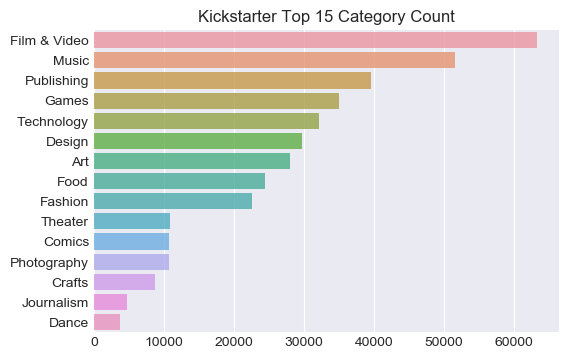

In [5]:
sns.set_style('darkgrid')
mains =data.main_category.value_counts().head(15)

x = mains.values
y = mains.index

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
ax = sns.barplot(y=y, x=x, orient='h', alpha=0.8)

plt.title('Kickstarter Top 15 Category Count')
plt.show()

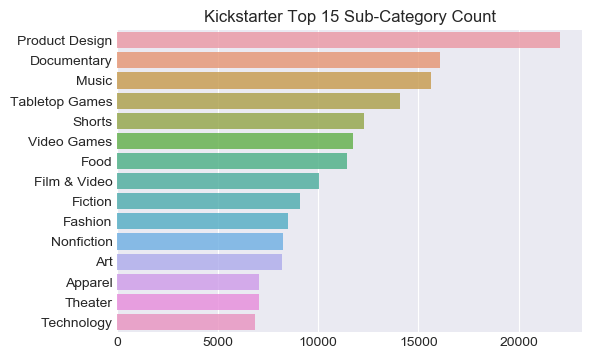

In [6]:
cats = data.category.value_counts().head(15)

x = cats.values
y = cats.index

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
ax = sns.barplot(y=y, x=x, orient='h', alpha=0.8)

plt.title('Kickstarter Top 15 Sub-Category Count')
plt.show()

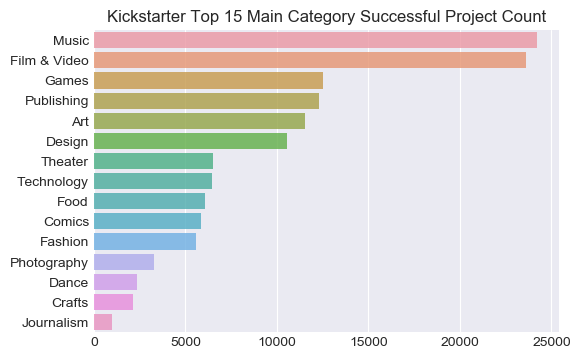

In [7]:
successful_data = data[data.state == 1]
suc_cats = successful_data.main_category.value_counts().head(15)

x = suc_cats.values
y = suc_cats.index

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
ax = sns.barplot(y=y, x=x, orient='h',  alpha=0.8)

plt.title('Kickstarter Top 15 Main Category Successful Project Count')
plt.show()

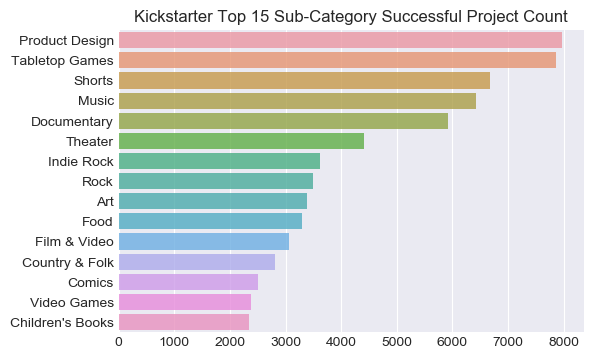

In [8]:
successful_data = data[data.state == 1]
suc_cats = successful_data.category.value_counts().head(15)

x = suc_cats.values
y = suc_cats.index

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
ax = sns.barplot(y=y, x=x, orient='h', alpha=0.8)

plt.title('Kickstarter Top 15 Sub-Category Successful Project Count')
plt.show()

# Basic Stat Analysis

In [9]:
print("Total Number of Completed Projects:", len(data),"\n"
      "Total Number of Successful Projects:", len(data[data.state == 1]),"\n"
      "Successful Rate Among All projects:",str(round(len(data[data.state == 1])/len(data)* 100,2)) + "%\n"
      "Number of Catagories: Main catagories num -", len(set(data["main_category"])), "Sub catagories num -", len(set(data["category"])),"\n"
     )

Total Number of Completed Projects: 375862 
Total Number of Successful Projects: 133956 
Successful Rate Among All projects: 35.64%
Number of Catagories: Main catagories num - 15 Sub catagories num - 159 



In [10]:
data.describe(percentiles=[0.3,0.7])

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.758620e+05,3.758620e+05,375862.000000,3.720660e+05,3.758620e+05,3.758620e+05
mean,4.887465e+04,9.687431e+03,105.896866,7.080215e+03,9.082678e+03,4.532720e+04
std,1.176595e+06,9.588649e+04,909.952393,7.893105e+04,9.127075e+04,1.145865e+06
min,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
30%,2.500000e+03,7.000000e+01,3.000000,4.000000e+01,7.000000e+01,2.500000e+03
50%,5.100000e+03,6.250000e+02,12.000000,4.000000e+02,6.274500e+02,5.480000e+03
70%,1.250000e+04,2.941406e+03,42.000000,2.105800e+03,2.928782e+03,1.238927e+04
max,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


### Check for Null data and use bfill to fill the data

In [11]:
pd.isna(data).any()
data.fillna(method="bfill",inplace=True)

# Convert Catagorial Data to Numerical

In [12]:
data.category = "sub_"+ data.category

In [13]:
le = LabelEncoder()
total =[]
for col in data.columns:
        if col != "name":
            if data.dtypes[col] == "object":
                total +=  list(data[col].astype(str))
le.fit(total)
for col in data.columns:
        if col != "name":
            if data.dtypes[col] == "object":
                data[col] = le.transform(data[col].astype(str))



In [14]:
data.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,160,43,23,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,False,0,22,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,145,20,51,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,False,15,50,100.0,2421.0,30000.00
1000004038,Where is Hank?,145,20,51,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,False,3,50,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,142,35,51,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,False,1,50,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,107,20,51,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,False,14,50,1283.0,1283.0,19500.00


# Correlation

In [15]:
data.corr()

,category,main_category,currency,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
category,1.000000,0.157762,-0.012248,0.003316,0.028928,0.022527,0.041134,-0.012496,0.025946,0.029428,0.002602
main_category,0.157762,1.000000,-0.016455,0.003344,0.002720,-0.033623,-0.005700,-0.016755,0.003370,0.003672,0.001594
currency,-0.012248,-0.016455,1.000000,-0.005467,0.005864,0.067145,0.012154,0.979930,0.014107,0.010847,-0.003873
goal,0.003316,0.003344,-0.005467,1.000000,0.007339,-0.024483,0.004077,-0.004920,0.005597,0.005172,0.941677
pledged,0.028928,0.002720,0.005864,0.007339,1.000000,0.111850,0.717427,0.005672,0.856305,0.953369,0.005099
state,0.022527,-0.033623,0.067145,-0.024483,0.111850,1.000000,0.129230,0.066111,0.097320,0.110786,-0.023246
backers,0.041134,-0.005700,0.012154,0.004077,0.717427,0.129230,1.000000,0.012082,0.697003,0.752489,0.004584
country,-0.012496,-0.016755,0.979930,-0.004920,0.005672,0.066111,0.012082,1.000000,0.013858,0.010901,-0.003072
usd pledged,0.025946,0.003370,0.014107,0.005597,0.856305,0.097320,0.697003,0.013858,1.000000,0.905955,0.006240
usd_pledged_real,0.029428,0.003672,0.010847,0.005172,0.953369,0.110786,0.752489,0.010901,0.905955,1.000000,0.005669


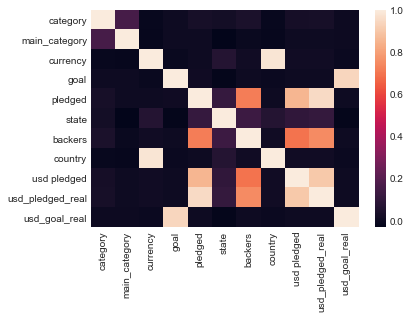

In [16]:
sns.heatmap(data.corr(), 
        xticklabels=data.corr().columns,
        yticklabels=data.corr().columns)

In [17]:
%store data
%store le

Stored 'data' (DataFrame)
Stored 'le' (LabelEncoder)
